(540, 2500) (540,)


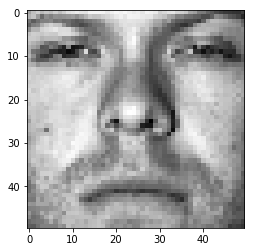

(100, 2500) (100,)


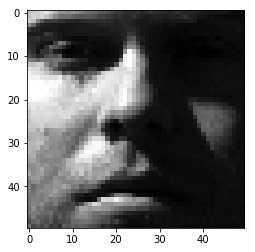

In [24]:
import numpy as np
from scipy import misc
from matplotlib import pylab as plt
import matplotlib.cm as cm
from notebook import *
%matplotlib inline

def load_data(file_path):
    labels, data = [], []
    for line in open(file_path):
        im = misc.imread(line.strip().split()[0])
        data.append(im.reshape(2500,))
        labels.append(line.strip().split()[1])
    return np.array(data, dtype=float), np.array(labels, dtype=int)
# load train data
train_data, train_labels = load_data('./faces/train.txt')
print train_data.shape, train_labels.shape
# print one of train data
plt.imshow(train_data[9, :].reshape(50,50), cmap=cm.Greys_r)
plt.show()
# load test data
test_data, test_labels = load_data('./faces/test.txt')
print test_data.shape, test_labels.shape
# print one of test data
plt.imshow(test_data[9, :].reshape(50,50), cmap=cm.Greys_r)
plt.show()

<function matplotlib.pyplot.show>

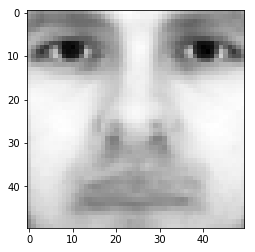

In [25]:
# average face
face_sum = np.sum(train_data, axis=0)
face_mean = np.array([su / len(train_data) for su in face_sum])
plt.imshow(face_mean.reshape(50, 50), cmap = cm.Greys_r)
plt.show

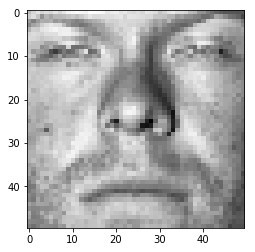

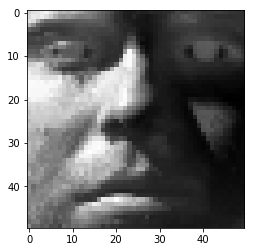

In [26]:
# mean subtraction
sub_train_data = train_data - face_mean
sub_test_data = test_data - face_mean
# print one of sub_train_data
plt.imshow(sub_train_data[9, :].reshape(50, 50), cmap=cm.Greys_r)
plt.show()
# print one of sub_test_data
plt.imshow(sub_test_data[9, :].reshape(50, 50), cmap=cm.Greys_r)
plt.show()

In [27]:
# Perform Singular Value Decomposition
u, d, v = np.linalg.svd(train_data)
# print first 10 eigenfaces
def print_eigenfaces(i):
    plt.imshow(v[i, :].reshape(50, 50), cmap=cm.Greys_r)
    plt.show()
interact(print_eigenfaces, i=(1, 10, 1))

<function __main__.print_eigenfaces>

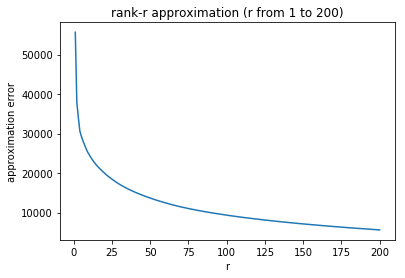

In [28]:
# Low-rank Approximation
from scipy import linalg
d = linalg.diagsvd(d, train_data.shape[0], train_data.shape[1])
def low_rank_approx(SVD, X, r):
    u, d, v = SVD
    X_hat = np.dot(np.dot(u[:, :r], d[:r, :r]), v[:r, :])
    return np.linalg.norm((X - X_hat), 'fro')
y = []
x = range(1, 201)
for r in x:
    y.append(low_rank_approx((u, d, v), train_data, r))
plt.title('rank-r approximation (r from 1 to 200)')
plt.xlabel('r')
plt.ylabel('approximation error')
plt.plot(x, y)
plt.show()

In [34]:
# interactive r-rank approximation of an example picture
def show_approximation(r):
    X_hat = np.dot(np.dot(u[:, :r], d[:r, :r]), v[:r, :])
    plt.title(str(r) + '-rank approximation')
    plt.imshow(X_hat[9, :].reshape(50, 50), cmap=cm.Greys_r)
    plt.show()
interact(show_approximation, r=(1, 200, 1))

<function __main__.show_approximation>

In [30]:
# Eigenface Feature
def get_F(r):
    return np.dot(train_data, v[:r, :].T)
def get_F_test(r):
    return np.dot(test_data, v[:r, :].T)

score when r=10:  0.83


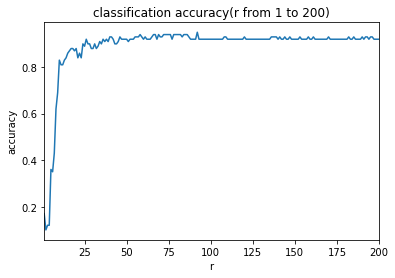

In [33]:
# Face Recognition
from sklearn.linear_model import LogisticRegression
cls = LogisticRegression(max_iter=1000, multi_class='ovr')
print "score when r=10: ",
print cls.fit(get_F(10), train_labels).score(get_F_test(10), test_labels)
x = range(1, 201)
y = []
for r in x:
    y.append(cls.fit(get_F(r), train_labels).score(get_F_test(r), test_labels))
plt.title('classification accuracy(r from 1 to 200)')
plt.xlabel('r')
plt.ylabel('accuracy')
plt.xlim([1,200])
plt.plot(x, y)

In [ ]:
if row[0]:
    Country_Name = row[0]
else:
    Country_Name = "Default_Value"